In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv'
df = pd.read_csv(url)

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [4]:
data = df['value'].values.reshape(-1, 1)

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(data_scaled)

In [7]:
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)
print(df['anomaly'].value_counts())

anomaly
0    3991
1      41
Name: count, dtype: int64


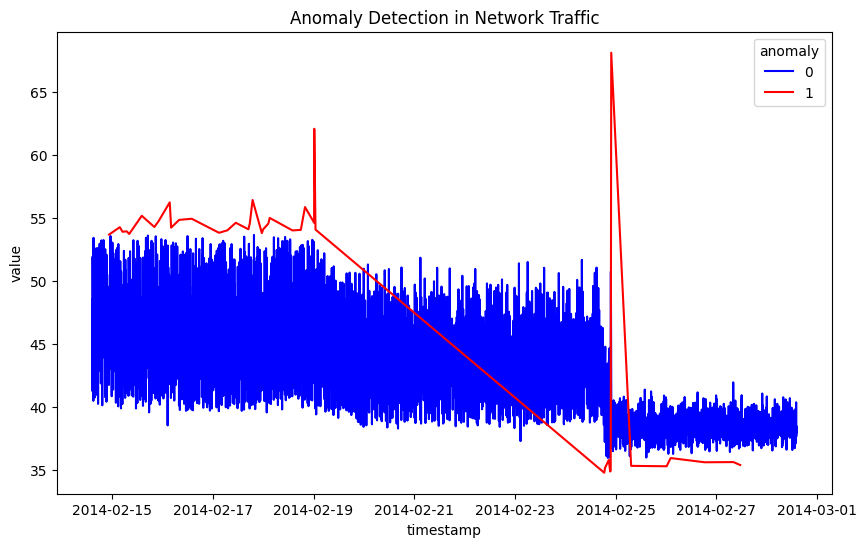

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='timestamp', y='value', hue='anomaly', palette=['blue', 'red'])
plt.title('Anomaly Detection in Network Traffic')
plt.show()

In [9]:
print(classification_report(df['anomaly'], df['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3991
           1       1.00      1.00      1.00        41

    accuracy                           1.00      4032
   macro avg       1.00      1.00      1.00      4032
weighted avg       1.00      1.00      1.00      4032



In [10]:
df.to_csv('anomaly_detection_results.csv')